In [1]:
import os
import re
import pickle
from collections import defaultdict

scores_path = "./evaluation_scores"

label_to_scores = defaultdict(list)

for filename in os.listdir(scores_path):
    match = re.match(r"evaluation_scores_([a-zA-Z0-9]*)_", filename)

    if match is None:
        print(f"Ignoring {filename}.")
        continue
        
    label = match.group(1)
    path = os.path.join(scores_path, filename)
    with open(path, "rb") as file:
        scores = pickle.load(file)
        label_to_scores[label].append(scores)
        
label_to_scores.keys()

dict_keys(['per', 'dqn', 'doubleper', 'random', 'doubledqn'])

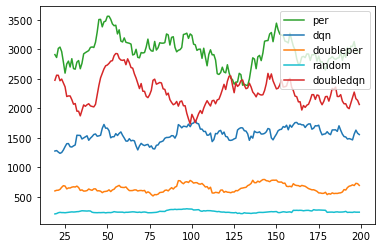

In [7]:
import numpy as np
import matplotlib.pyplot as plt

from plot.plot_data import MultiRunData, SingleRunData


smoothing_window = 20  # set as 0 for no smoothing
# Used to keep consistency among our plot colors
colors = {
    "dqn": "tab:blue",
    "per": "tab:green",
    "random": "tab:cyan",
    "doubledqn": "tab:red",
    "doubleper": "tab:orange",
}

run_data = []
for label, scores in label_to_scores.items():
    if len(scores) == 1:
        run_data.append(
            SingleRunData(scores[0], label, smoothing_window=smoothing_window, color=colors.get(label))
        )
    elif len(scores) > 1:
        run_data.append(
            MultiRunData(scores, label, smoothing_window=smoothing_window)
        )

for run in run_data:
    run.plot(plt)
        
plt.legend()
# plt.show()
plt.savefig("high_res_evaluation_comparison_plot.png", dpi=300)

In [19]:
average_map = {}
for label, scores in label_to_scores.items():
    evaluation_scores = scores[0]
    average_map[label] = np.average(evaluation_scores)

average_map

{'per': 2953.0,
 'dqn': 1532.2,
 'doubleper': 646.35,
 'random': 243.3,
 'doubledqn': 2280.5}